03. Wine 데이터셋 실습 (다중 클래스 분류)

#### 1️⃣ 목표 정의
- 문제 유형: 다중 클래스 분류 (3개 클래스)
- 목표: 와인의 화학 성분으로 와인 종류 예측
- 평가 지표: Accuracy (+ confusion matrix)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

df = X.copy()
df["target"] = y


print(X.shape) # 데이터량 보기 ㅇㅊㅇ 소형 정형데이터, 복잡한거 없어도될듯
print(y.value_counts()) # 분류일 때 - 0,1,2 형태이니 다중 분류

(178, 13)
target
1    71
0    59
2    48
Name: count, dtype: int64


| y 형태   | 문제    |
| ------ | ----- |
| 0/1    | 이진 분류 |
| 0/1/2… | 다중 분류 |
| 실수값    | 회귀    |


X.shape에서
| 상황      | 판단       |
| ------- | -------- |
| 샘플 ≫ 특성 | 단순 모델 OK |
| 특성 ≫ 샘플 | 과적합 위험   |


In [ ]:
# 데이터 확인
X.info() # 결측치 확인, 인코딩 필요한지
X.describe() # 스케일 차이 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


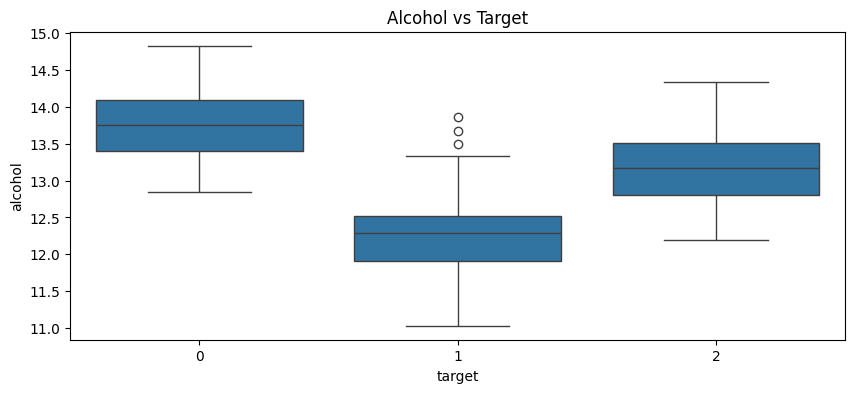

In [8]:
#단변량 영향 확인 : feature 하나씩이 target에 영향 있는지
# 클래스별 분포가 다르면 → 영향 있음

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x="target", y="alcohol")
plt.title("Alcohol vs Target")
plt.show()

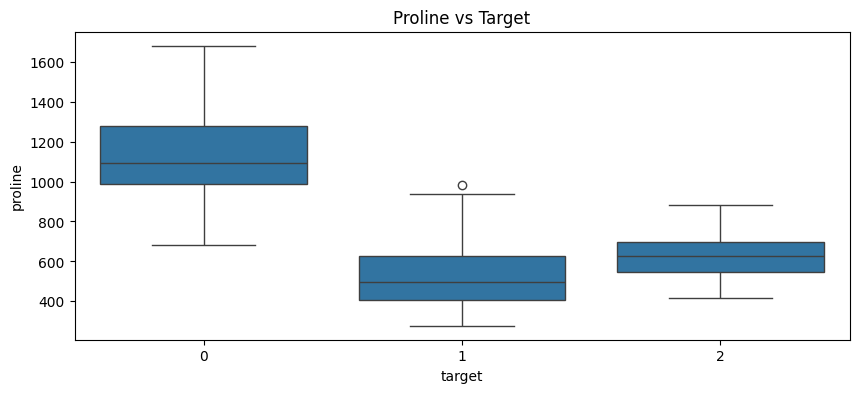

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x="target", y="proline")
plt.title("Proline vs Target")
plt.show()

'''
보이는 판단

alcohol / proline → 클래스별 분리 명확
영향 큼
'''


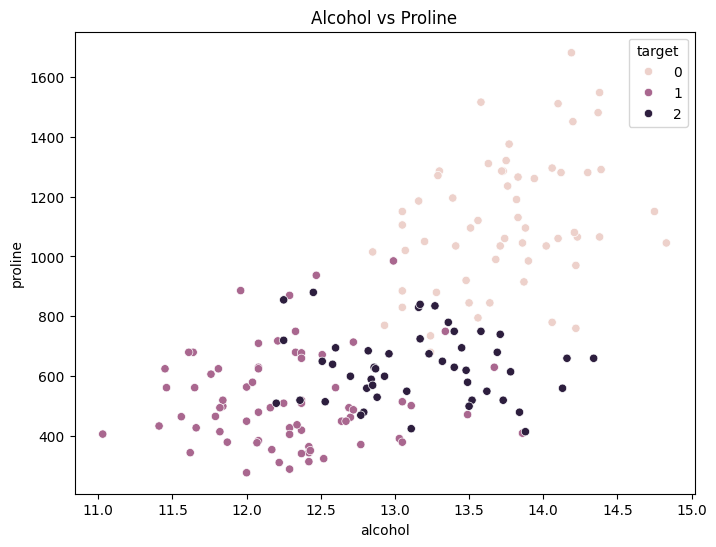

In [ ]:
# 이변량 영향 확인 : feature 조합이 분리를 더 잘 만드는지
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="alcohol",
    y="proline",
    hue="target"
)
plt.title("Alcohol vs Proline")
plt.show()

'''
📌 기준
색깔이 덜 섞일수록 → 좋은 조합
직선 경계로 나눠질 것 같으면 → 선형 모델 가능

👉 Wine은
✔️ 선형 모델 충분히 가능 판단
'''

In [ ]:
# 전체 관계 한 번에 보기 (pairplot)

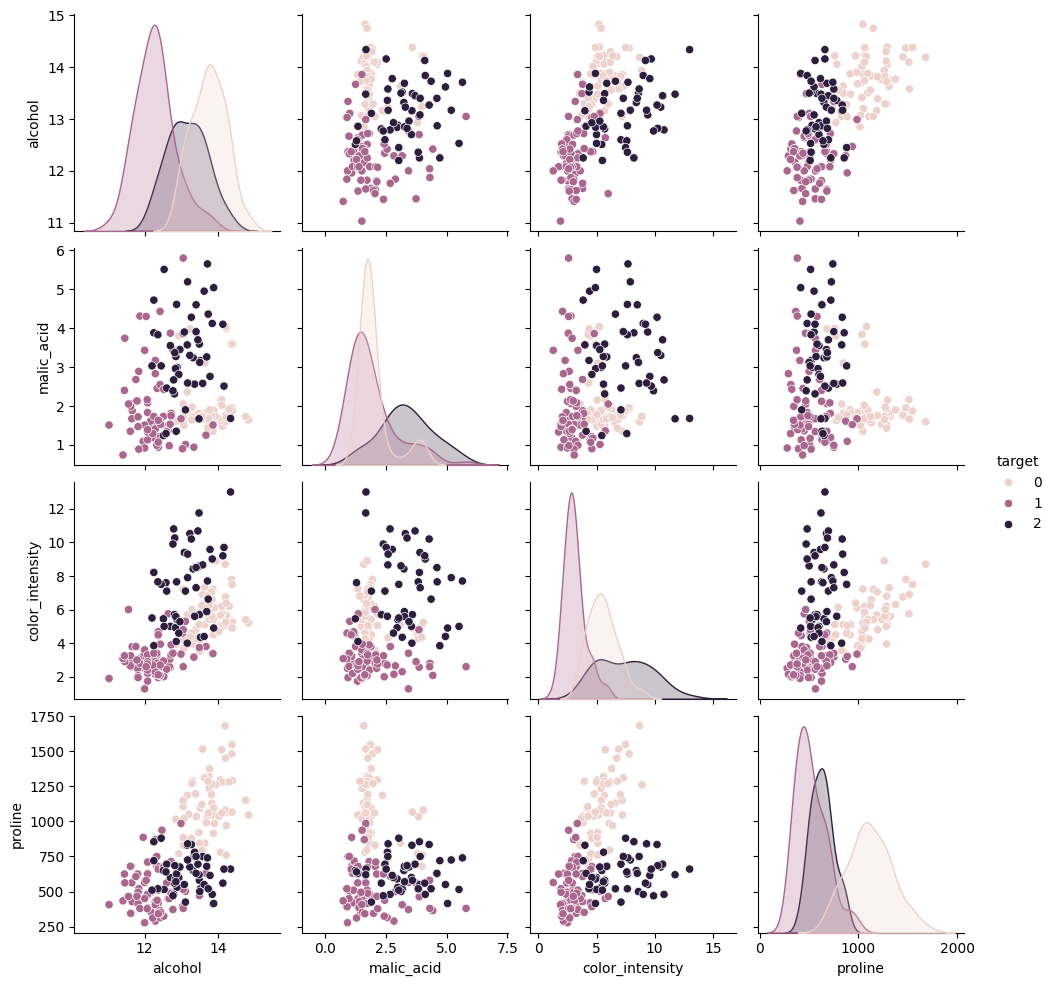

In [ ]:
sns.pairplot(
    df[["alcohol", "malic_acid", "color_intensity", "proline", "target"]],
    hue="target"
)
plt.show()
# “모든 feature가 중요하진 않다”는 걸 확인


X.describe()에서 피처간의 단위 / 범위비교

| feature | min | max  |
| ------- | --- | ---- |
| alcohol | 11  | 14   |
| proline | 278 | 1680 |

범위 차이가 큰걸 확인

거리 / 계수 기반 = 스케일 민감

| 모델         | 기준      |
| ---------- | ------- |
| Logistic   | 스케일링 필수 |
| SVM        | 필수      |
| KNN        | 필수      |
| Linear Reg | 필수      |
| Tree       | 불필요     |
| RF         | 불필요     |


In [ ]:
# 학습 / 테스트 분리
from sklearn.model_selection import train_test_split

#분류 → stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

| 문제       | 1번 모델               |
| -------- | ------------------- |
| 이진/다중 분류 | Logistic Regression |
| 회귀       | Linear Regression   |

- 성능이 아니라 “기준선” 만드는 단계

In [ ]:
# 스케일링 포함 파이프라인 구성
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=1000,
        random_state=42
    ))
])

pipe_lr.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

In [5]:
# 평가
from sklearn.metrics import accuracy_score, classification_report

y_pred = pipe_lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



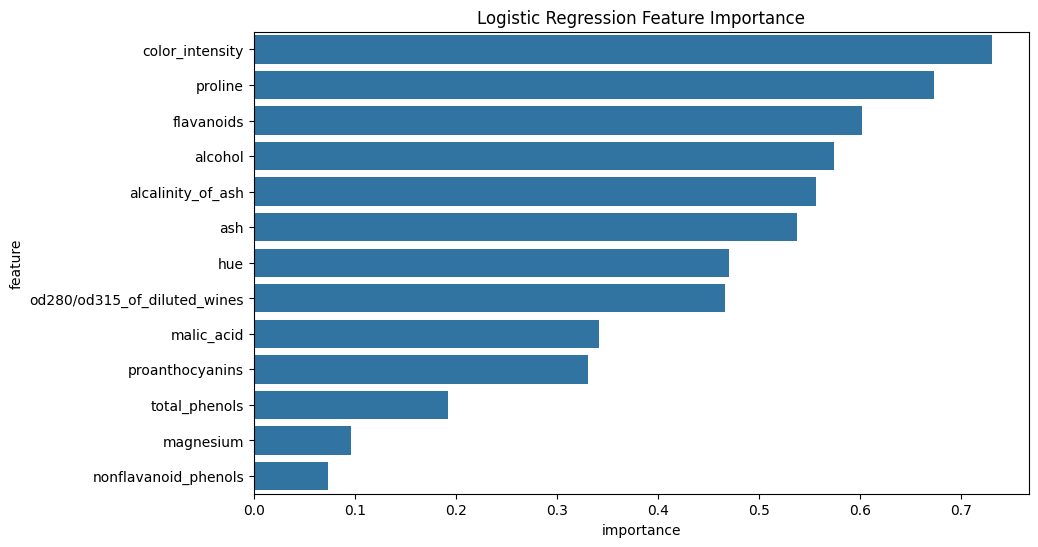

In [12]:
#계수 시각화 (중요!)
coef = pipe_lr.named_steps["model"].coef_
coef_mean = np.mean(np.abs(coef), axis=0)

coef_df = pd.DataFrame({
    "feature": X.columns,
    "importance": coef_mean
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x="importance", y="feature")
plt.title("Logistic Regression Feature Importance")
plt.show()

'''
alcohol, proline, flavanoids 상위

👉 시각화 결과와 일치
'''

In [6]:
# RandomForest 도 보기
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, rf_pred))


RF Accuracy: 1.0


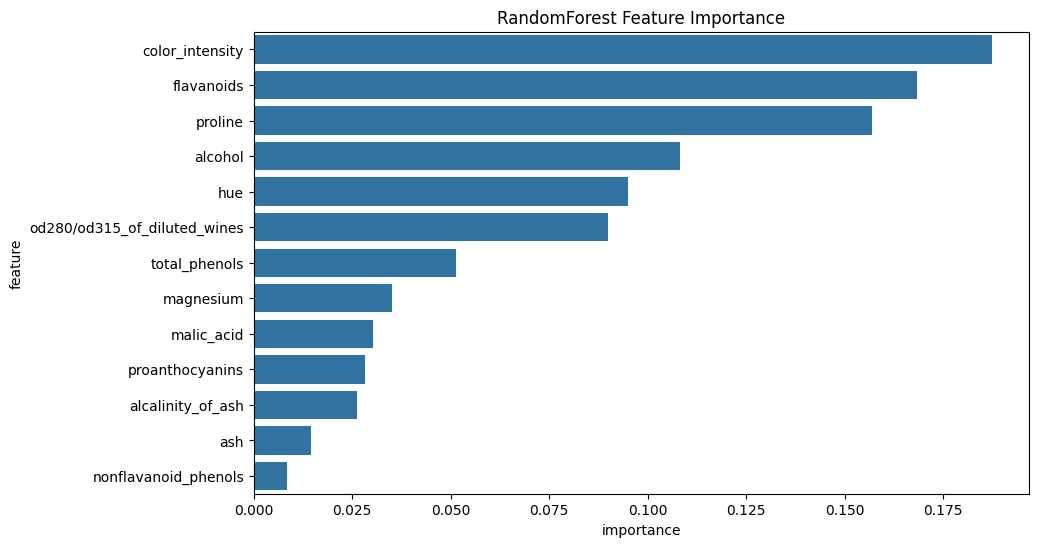

In [13]:
# RF 중요도 시각화
rf_df = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=rf_df, x="importance", y="feature")
plt.title("RandomForest Feature Importance")
plt.show()


In [14]:
# Logistic vs RF 비교 정리 (핵심)
compare_df = coef_df.merge(
    rf_df,
    on="feature",
    suffixes=("_logistic", "_rf")
)

compare_df.head(10)


,feature,importance_logistic,importance_rf
0,color_intensity,0.730677,0.187404
1,proline,0.673270,0.157024
2,flavanoids,0.602310,0.168373
3,alcohol,0.574358,0.108171
4,alcalinity_of_ash,0.556709,0.026168
5,ash,0.538171,0.014577
6,hue,0.470410,0.094966
7,od280/od315_of_diluted_wines,0.466792,0.089898
8,malic_acid,0.341441,0.030246
9,proanthocyanins,0.330515,0.028266
